In [1]:
import pandas as pd
import numpy as np

In [2]:
filepath = open("ratings.csv", 'r')

In [3]:
ratings = pd.read_csv(filepath, header=0, 
                      dtype={'userId':str, 'movieId':str, 'rating':np.float64, 'timestamp':np.int64})

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
type(ratings)

pandas.core.frame.DataFrame

In [6]:
ratings.loc[1]

userId                1
movieId            1029
rating                3
timestamp    1260759179
Name: 1, dtype: object

In [7]:
ratings[['userId', 'rating']].head()

,userId,rating
0,1,2.5
1,1,3.0
2,1,3.0
3,1,2.0
4,1,4.0


In [8]:
ratings[ratings['userId']=='2'].index.tolist()[:10]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [9]:
ratings[ratings['userId']=='1'][ratings['movieId']=='1172']

/Users/Jerry/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,userId,movieId,rating,timestamp
4,1,1172,4.0,1260759205


In [10]:
value = ratings[(ratings['userId']=='1') & (ratings['movieId']=='1172')]

In [11]:
ratings.at[4,'rating']

4.0

In [12]:
ratings[ratings['userId']=='1'][ratings['movieId']=='1172'].index.tolist()

/Users/Jerry/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[4]

In [13]:
savefile = 'ratings_x.csv'
ratings.columns = ['userId', 'itemId', 'rating', 'timestamp']
#ratings.to_csv(savefile, index=False)

In [14]:
all_user_record = ratings['userId'].values
print type(all_user_record)
users = list(set(all_user_record))
users.sort()
import random as rnd
print rnd.sample(users, 10)

<type 'numpy.ndarray'>
['85', '24', '378', '58', '402', '464', '348', '432', '36', '32']


In [15]:
next(ratings.iterrows())

(0, userId                1
 itemId               31
 rating              2.5
 timestamp    1260759144
 Name: 0, dtype: object)

In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ratings, test_size=0.1, random_state=0)
print type(train_set)
print train_set.size
print test_set.size
print ratings.size
train_set

<class 'pandas.core.frame.DataFrame'>
360012
40004
400016


,userId,itemId,rating,timestamp
95043,624,105351,1.5,1412012554
7189,43,2081,4.0,974768965
91208,605,3110,4.0,980176341
89494,596,1527,3.0,1138658667
401,5,2762,3.5,1163373743
40690,294,3812,3.0,1047071934
16148,104,8371,3.5,1446674097
46767,344,440,4.0,850726689
1492,15,2600,3.0,1033344995
21736,150,4343,3.5,1114307108


In [17]:
train_features = train_set[['userId', 'itemId','timestamp']].values
print train_features
train_target = train_set['rating'].values
print train_target

[['624' '105351' 1412012554]
 ['43' '2081' 974768965]
 ['605' '3110' 980176341]
 ..., 
 ['306' '1061' 939717048]
 ['311' '922' 897414235]
 ['475' '3703' 1447256595]]
[ 1.5  4.   4.  ...,  3.   2.   4. ]


In [19]:
train_df = pd.DataFrame(train_features, columns=['userId', 'itemId', 'timestamp'])
train_df

,userId,itemId,timestamp
0,624,105351,1412012554
1,43,2081,974768965
2,605,3110,980176341
3,596,1527,1138658667
4,5,2762,1163373743
5,294,3812,1047071934
6,104,8371,1446674097
7,344,440,850726689
8,15,2600,1033344995
9,150,4343,1114307108


In [20]:
train_df['ratings'] = pd.Series(train_target)
train_df

,userId,itemId,timestamp,ratings
0,624,105351,1412012554,1.5
1,43,2081,974768965,4.0
2,605,3110,980176341,4.0
3,596,1527,1138658667,3.0
4,5,2762,1163373743,3.5
5,294,3812,1047071934,3.0
6,104,8371,1446674097,3.5
7,344,440,850726689,4.0
8,15,2600,1033344995,3.0
9,150,4343,1114307108,3.5


In [22]:
train_features

array([['624', '105351', 1412012554],
       ['43', '2081', 974768965],
       ['605', '3110', 980176341],
       ..., 
       ['306', '1061', 939717048],
       ['311', '922', 897414235],
       ['475', '3703', 1447256595]], dtype=object)

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(train_features)

<generator object split at 0x114d85910>

In [43]:
import random as rnd
ratings.size
sample = ratings.sample(100)
sample[['userId', 'itemId', 'rating']]

,userId,itemId,rating
75264,522,6888,3.0
99475,665,2282,1.0
24874,179,4226,4.0
2612,15,135567,3.0
46767,344,440,4.0
7969,49,3196,4.0
41389,297,1274,4.0
23966,169,58803,5.0
91777,607,33004,4.0
17506,117,73023,4.0


In [46]:
np.max(ratings['rating'])

5.0

In [48]:
import networkx as nx
sg = nx.star_graph(11)

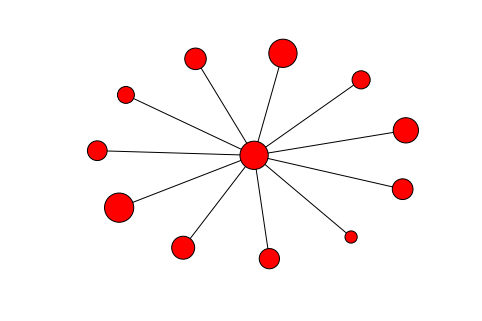

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
pos=nx.spring_layout(sg,iterations=200)
nx.draw(sg, pos, node_size=[np.random.randint(100, 1000) for _ in range(11)], cmap=plt.cm.Blues)